# Clustering:15 points

In [1]:
import sklearn
from sklearn import datasets
from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt

## 2.1 Data

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
#print(iris.data)

## 2.2 Choosing for k-means

#### 1.	Load the data and apply the k-means algorithm implemented in sklean with the Iris dataset. (2 points)

In [3]:
clustering = KMeans(n_clusters=5)
iris_k_means = clustering.fit(data)

#### 2. Implement your own SSQ function (4 points)

In [4]:
def sum_of_squared_deviation(data, clusters, labels):
    squared_deviation = [(points - clusters[labels[x]])**2  for x, points in enumerate(data)]
    return sum(sum(squared_deviation))

#print(iris_k_means.cluster_centers_)
#print(type(data))
#print(iris_k_means.labels_)
print(sum_of_squared_deviation(iris.data, iris_k_means.cluster_centers_, iris_k_means.labels_))

46.44618205128205


#### 3. Demonstrate the evolving values of SSQ given different k in a single plot(6 points)

[681.3706000000003, 152.3479517603579, 78.851441426146, 57.256009315718146, 46.44618205128205, 39.03998724608724, 34.5730308278678, 30.37664826839827, 28.297196391843443, 26.1667415401151, 24.63524410641929]


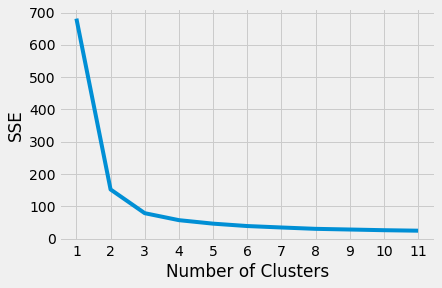

In [5]:
ssq = list()
for k in range(1,12):
    clustering = KMeans(n_clusters=k)
    iris_k_means = clustering.fit(data)
    #sse.append(iris_k_means.inertia_)
    ssq.append(sum_of_squared_deviation(iris.data, iris_k_means.cluster_centers_, iris_k_means.labels_))
print(ssq)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 12), ssq)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### 4.	Given the output, respond to the following question. Where did you estimate the elbow point to be, or between whatvalues of k? To adequately answer this question, consider generating the measure for multiple times, as there might be some variation in the value of k that they estimate as optimal. (3 points)

#### Generating the measure using 50 iterations:

[681.3706000000003, 152.3479517603579, 78.851441426146, 57.22847321428569, 46.44618205128205, 39.03998724608724, 34.29971212121213, 29.98894395078605, 27.99207067700101, 25.84215641041104, 24.329786899375122]


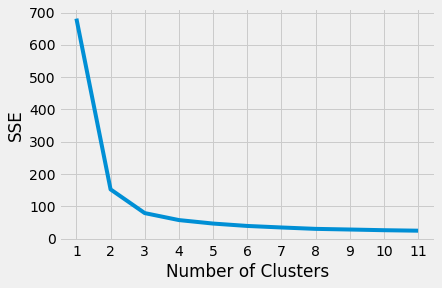

In [6]:
ssq = list()
for k in range(1,12):
    clustering = KMeans(n_clusters=k, n_init=50)
    iris_k_means = clustering.fit(data)
    #sse.append(iris_k_means.inertia_)
    ssq.append(sum_of_squared_deviation(iris.data, iris_k_means.cluster_centers_, iris_k_means.labels_))
print(ssq)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 12), ssq)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#### I estimated the elbow point to be in k=3 prior to plotting the values, but after observing the plot i can say it is between k=2 and k=3.